In [5]:
import pandas as pd
#importing pandas library
df=pd.read_csv('rating.csv')
#reading the file
df.head(10)
#displaying first 10 rows

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [6]:
movie_titles_genre=pd.read_csv("movies.csv")
#reading the file
movie_titles_genre.head(10)
#displaying first 10 rows

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [7]:
df=df.merge(movie_titles_genre,on='movieId',how='left')
#merging both the files read previously
df.head(10)
#displaying first 10 rows

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [9]:
df1 = df.genres.copy()
#copying the content of genres from the dataframe
df1

0         Adventure|Animation|Children|Comedy|Fantasy
1                                      Comedy|Romance
2                               Action|Crime|Thriller
3                                    Mystery|Thriller
4                              Crime|Mystery|Thriller
                             ...                     
100831                          Drama|Horror|Thriller
100832                          Action|Crime|Thriller
100833                                         Horror
100834                                  Action|Sci-Fi
100835                    Action|Crime|Drama|Thriller
Name: genres, Length: 100836, dtype: object

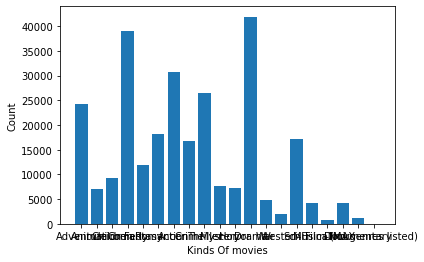

In [10]:
#finding different kinds of movies present in the collection 
from collections import Counter
#to count each kind of movies
new_list=[]
list= df1.str.split("|")
for a in list:
    for i in a:
        new_list.append(i)
#print(new_list)
c=[]
for each in new_list:
    if each != "":
         c.append(each)

f= dict(Counter(c))
f
import matplotlib.pyplot as plt
plt.bar(*zip(*f.items()))

plt.xlabel("Kinds Of movies")
plt.ylabel("Count")
plt.show()

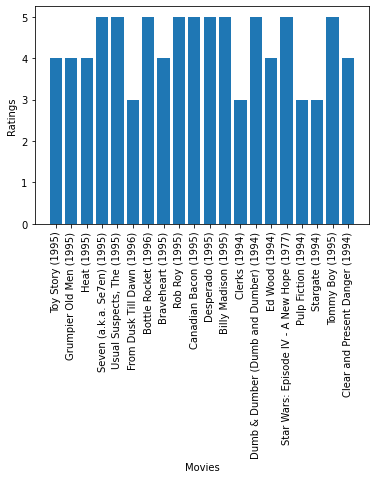

In [11]:
#plotting a bar graph for first 20 movies versus ratings
plt.bar(df.head(20)['title'],df.head(20)['rating'])
plt.xticks(rotation = 90)
plt.xlabel("Movies")
plt.ylabel("Ratings")
plt.show()

In [12]:
#finding the average rating of each movie rated by different users 
avg_ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
avg_ratings.head(10)

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
'Tis the Season for Love (2015),1.500000
"'burbs, The (1989)",3.176471
'night Mother (1986),3.000000
(500) Days of Summer (2009),3.666667


In [13]:
#finding total ratings given to each movie
avg_ratings['Total Ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
avg_ratings.head(10)

,rating,Total Ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


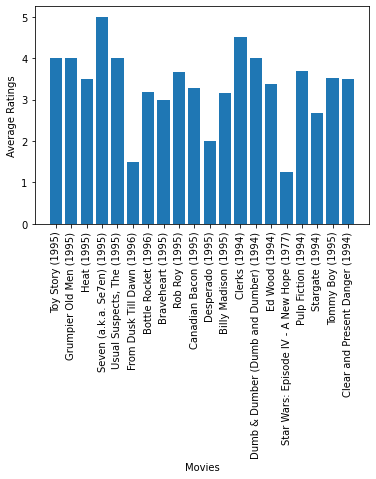

In [14]:
#plotting a bar graph for first 20 movies based on average rating
plt.bar(df.head(20)['title'],avg_ratings.head(20)['rating'])
plt.xticks(rotation = 90)
plt.xlabel("Movies")
plt.ylabel("Average Ratings")
plt.show()

In [15]:
#finding if a user has rated each movie
movie_user = df.pivot_table(index='userId',columns='title',values='rating')

In [16]:
movie_user

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [17]:
#finding the movies rated by a particular user
mylist=[]
ratingslist=[]
x=movie_user.iloc[2,:]
for i in range(9719):
    if x[i]==5 or x[i]==4 or x[i]==3 or x[i]==2 or x[i]==1:
        mylist.append(movie_user.columns[i])
        ratingslist.append(x[i])
x=mylist
y=ratingslist

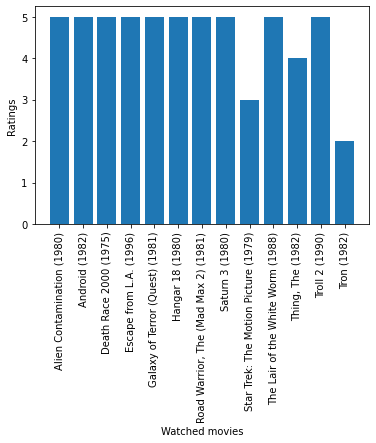

In [18]:
#plotting the above result
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel("Watched movies")
plt.ylabel("Ratings")
plt.show()

In [19]:
#calculating the correaltion of Jumanji(1995) with other movies
correlations = movie_user.corrwith(movie_user['Jumanji (1995)'])
correlations.head()

C:\Users\Raksha\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Raksha\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [20]:
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = recommendation.join(avg_ratings['Total Ratings'])
recommendation.head()

,Correlation,Total Ratings
title,,
"'burbs, The (1989)",0.120173,17
(500) Days of Summer (2009),0.397966,42
*batteries not included (1987),0.719636,7
10 Cent Pistol (2015),-1.000000,2
10 Cloverfield Lane (2016),1.000000,14


In [21]:
#recommending user those movies which are highly correlated with Jumanji (1995) and has ratings>100
recc = recommendation[recommendation['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()

In [22]:
recc = recc.merge(movie_titles_genre,on='title', how='left')
recc.head(10)

,title,Correlation,Total Ratings,movieId,genres
0,Jumanji (1995),1.000000,110,2,Adventure|Children|Fantasy
1,Cliffhanger (1993),0.581001,101,434,Action|Adventure|Thriller
2,True Lies (1994),0.493617,178,380,Action|Adventure|Comedy|Romance|Thriller
3,Back to the Future (1985),0.485140,171,1270,Adventure|Comedy|Sci-Fi
4,Mrs. Doubtfire (1993),0.480007,144,500,Comedy|Drama
5,"Net, The (1995)",0.474888,112,185,Action|Crime|Thriller
6,Trainspotting (1996),0.464547,102,778,Comedy|Crime|Drama
7,Twister (1996),0.460929,123,736,Action|Adventure|Romance|Thriller
8,"Incredibles, The (2004)",0.460369,125,8961,Action|Adventure|Animation|Children|Comedy
9,"Bourne Identity, The (2002)",0.440918,112,5418,Action|Mystery|Thriller
